In [1]:
from __future__ import print_function
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.utils import np_utils
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
import matplotlib.pyplot as plt

import os

Using TensorFlow backend.


In [2]:
#configure
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_Alexnet.h5'

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [5]:
# LeNet Define the Model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# print the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [6]:
# initiate RMSprop optimizer

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train,           
              batch_size=batch_size,
              epochs=epochs,
              #callbacks=callbacks,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 70s 1ms/step - loss: 1.8296 - acc: 0.3332 - val_loss: 1.5063 - val_acc: 0.4773
Epoch 2/20
50000/50000 [==============================] - 70s 1ms/step - loss: 1.5354 - acc: 0.4544 - val_loss: 1.3732 - val_acc: 0.5252
Epoch 3/20
50000/50000 [==============================] - 70s 1ms/step - loss: 1.3918 - acc: 0.5065 - val_loss: 1.2506 - val_acc: 0.5647
Epoch 4/20
50000/50000 [==============================] - 71s 1ms/step - loss: 1.2978 - acc: 0.5433 - val_loss: 1.1943 - val_acc: 0.5765
Epoch 5/20
50000/50000 [==============================] - 71s 1ms/step - loss: 1.2240 - acc: 0.5712 - val_loss: 1.1120 - val_acc: 0.6111
Epoch 6/20
50000/50000 [==============================] - 70s 1ms/step - loss: 1.1622 - acc: 0.5953 - val_loss: 1.0896 - val_acc: 0.6200
Epoch 7/20
50000/50000 [==============================] - 70s 1ms/step - loss: 1.1191 - acc: 0.6086 - val_loss: 1.0273 - val_acc

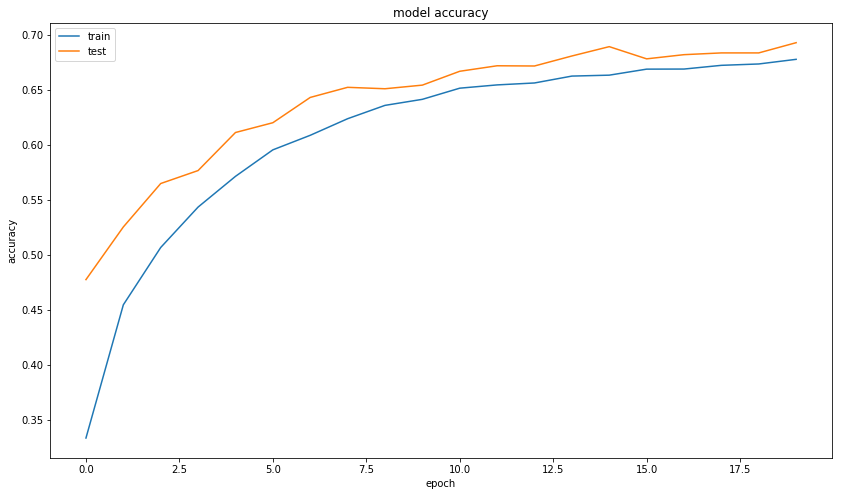

In [8]:
# summarize history for accuracy

plt.figure(figsize=(14,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

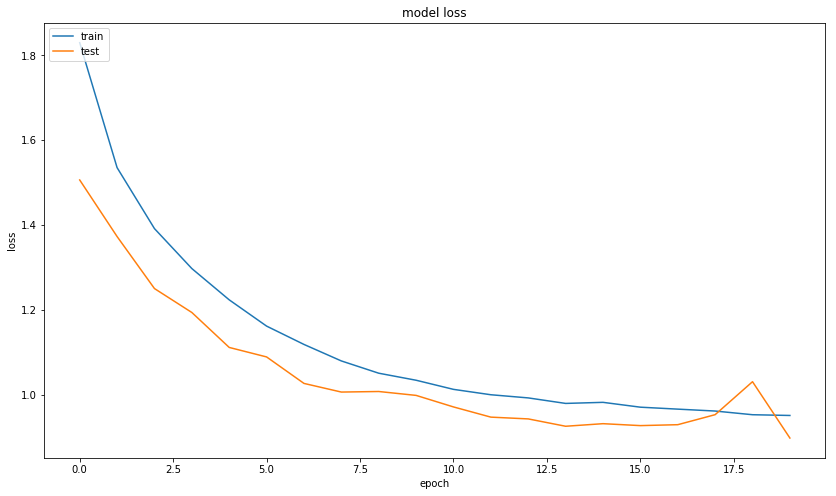

In [9]:
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
model.save('Cifar_LeNet.h5')